In [49]:
%pylab inline

import glob
import matplotlib
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [50]:
def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    pers = [2, 3, 4]
    list_of_s = []
    diff_min = []
    diff_max = []
    for mean in means:
        for per in pers:
            file_list = glob.glob('./results/validation/wide_prior/per_%d*_%.5f.txt'%(per, mean)) # narrow_prior 
            print('./results/validation/fig2c/per_%d*_%.5f'%(per, mean))
            filename = file_list[0]
            allele_freqs_file = open(filename, 'r')
            lines = allele_freqs_file.readlines()

            line = lines[13]       
            info = line.strip().split(': ')
            est_mean = float(info[1])
            list_of_s.append(est_mean)
            line = lines[14]       
            info = line.strip().split(': ')
            lower = float(info[1])
            line = lines[15]       
            info = line.strip().split(': ')
            upper = float(info[1])
            diff_min.append(est_mean - lower)
            diff_max.append(upper - est_mean)
            
    plt.figure(1)
    x_axis_labels = ('10^-5','10^-5','10^-5','10^-4','10^-4','10^-4','10^-3','10^-3','10^-3','10^-2','10^-2','10^-2')
    y_pos = np.arange(len(x_axis_labels))
    
    plt.errorbar(y_pos[0:3], list_of_s[0:3], yerr=[diff_min[0:3],diff_max[0:3]], marker = 'o') 
    plt.errorbar(y_pos[3:6], list_of_s[3:6], yerr=[diff_min[3:6],diff_max[3:6]], marker = 'o') 
    plt.errorbar(y_pos[6:9], list_of_s[6:9], yerr=[diff_min[6:9],diff_max[6:9]], marker = 'o') 
    plt.errorbar(y_pos[9:12], list_of_s[9:12], yerr=[diff_min[9:12],diff_max[9:12]], marker = 'o') 
    plt.xticks(y_pos, x_axis_labels, rotation = 45)
    plt.yscale('log')
    plt.ylabel("Estimated s")

./results/validation/fig2c/per_2*_0.00001
./results/validation/fig2c/per_3*_0.00001
./results/validation/fig2c/per_4*_0.00001
./results/validation/fig2c/per_2*_0.00010
./results/validation/fig2c/per_3*_0.00010
./results/validation/fig2c/per_4*_0.00010
./results/validation/fig2c/per_2*_0.00100
./results/validation/fig2c/per_3*_0.00100
./results/validation/fig2c/per_4*_0.00100
./results/validation/fig2c/per_2*_0.01000
./results/validation/fig2c/per_3*_0.01000
./results/validation/fig2c/per_4*_0.01000
CPU times: user 47.2 ms, sys: 3.98 ms, total: 51.2 ms
Wall time: 49.8 ms


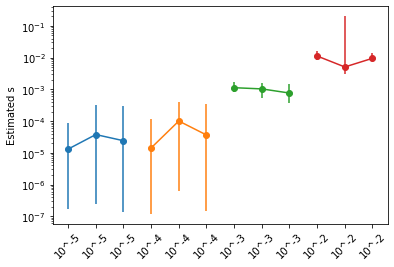

In [51]:
%%time
if __name__ == '__main__':
    main()